#### xgbClassifier/xgbRegressor

In [2]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, fetch_california_housing, load_diabetes
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree
import numpy as np

import graphviz
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25, random_state=42)

In [5]:
xgbc_model = XGBClassifier(n_estimators = 200, learning_rate=0.01, max_depth=2, random_state=42)
xgbc_model.fit(X_train, y_train)

preds = xgbc_model.predict(X_test)
preds_probability = xgbc_model.predict_proba(X_test)[:,:]
print(preds_probability)

[[0.07769491 0.84428203 0.07802306]
 [0.87288237 0.06569149 0.06142613]
 [0.06055531 0.0717311  0.8677136 ]
 [0.07297059 0.7929446  0.13408475]
 [0.06671529 0.69124424 0.24204046]
 [0.87288237 0.06569149 0.06142613]
 [0.07769491 0.84428203 0.07802306]
 [0.06608556 0.11448288 0.8194316 ]
 [0.07277572 0.7908271  0.13639718]
 [0.07769491 0.84428203 0.07802306]
 [0.06608556 0.11448288 0.8194316 ]
 [0.8722347  0.06564275 0.06212254]
 [0.87288237 0.06569149 0.06142613]
 [0.8722347  0.06564275 0.06212254]
 [0.87288237 0.06569149 0.06142613]
 [0.07297059 0.7929446  0.13408475]
 [0.0669054  0.07925314 0.8538414 ]
 [0.07757404 0.8429686  0.07945736]
 [0.07769491 0.84428203 0.07802306]
 [0.06055531 0.0717311  0.8677136 ]
 [0.8722347  0.06564275 0.06212254]
 [0.07464884 0.26156616 0.663785  ]
 [0.87288237 0.06569149 0.06142613]
 [0.06055531 0.0717311  0.8677136 ]
 [0.0669054  0.07925314 0.8538414 ]
 [0.0669054  0.07925314 0.8538414 ]
 [0.06055531 0.0717311  0.8677136 ]
 [0.0669054  0.07925314 0.85

In [6]:
accuracy = xgbc_model.score(X_test, y_test)
print(f"Acc : {accuracy:.2f}")

Acc : 1.00


In [7]:
from sklearn.metrics import classification_report

report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [8]:
import pandas as pd

features = iris.data
label = iris.target

iris_df = pd.DataFrame(data=features, columns=iris.feature_names)
iris_df['target'] = label
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

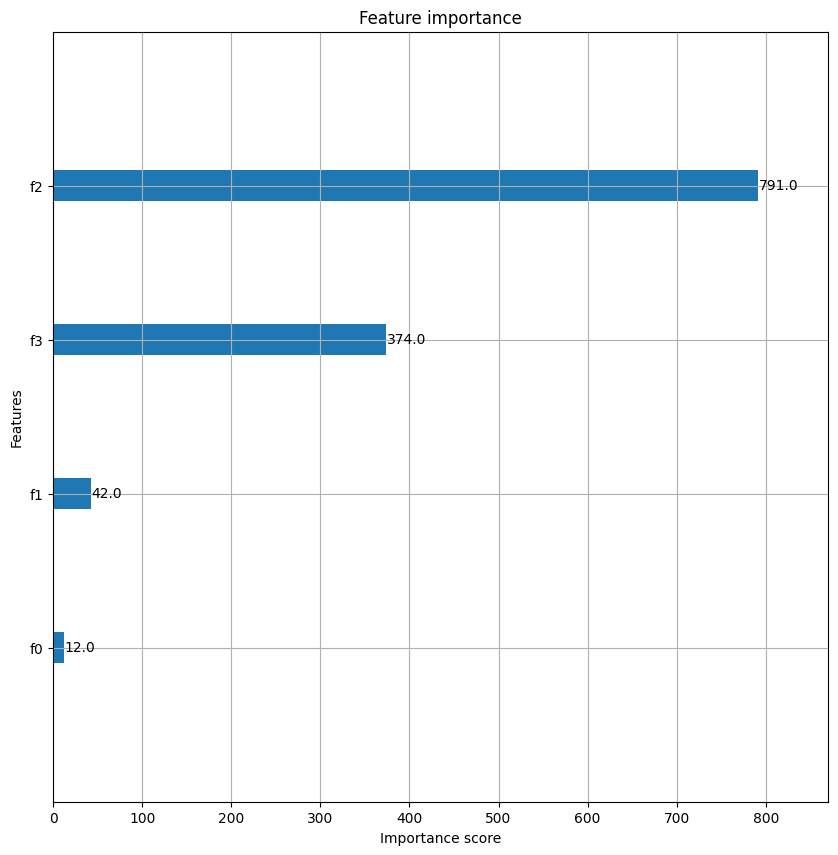

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgbc_model, ax=ax)

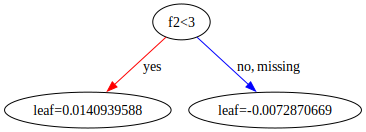

In [12]:
xgb.to_graphviz(xgbc_model)

c:\Users\main\miniconda3\envs\ml\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


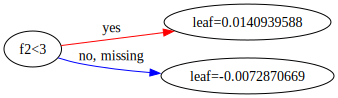

In [13]:
xgb.to_graphviz(xgbc_model, num_trees=0, rankdir='LR', size='10,10')

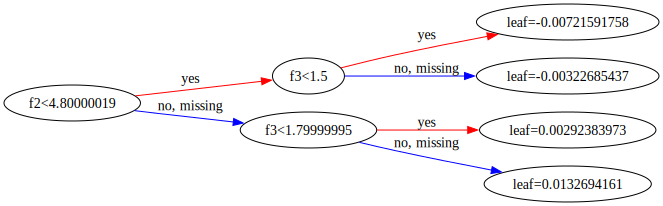

In [14]:
xgb.to_graphviz(xgbc_model, num_trees=5, rankdir='LR', size='10,10')

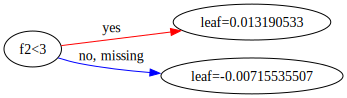

In [15]:
xgb.to_graphviz(xgbc_model, num_trees=15, rankdir='LR', size='10,10')

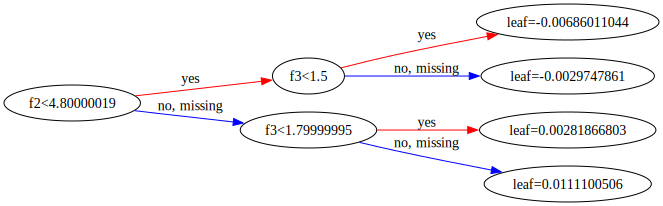

In [16]:
xgb.to_graphviz(xgbc_model, num_trees=50, rankdir='LR', size='10,10')

In [18]:
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.25, random_state=123)

In [19]:
xgbr_model = XGBRegressor(n_estimators=20, learning_rate=0.2,
                          objective='reg:squarederror',
                          max_depth=4, random_state=123)

In [20]:
xgbr_model.fit(X_train, y_train)
h_preds = xgbr_model.predict(X_test)

In [21]:
h_accuracy = xgbr_model.score(X_test, y_test)
print(f"Acc : {h_accuracy:.2f}")

Acc : 0.78


In [22]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, h_preds)
print(f"mse : {mse:.2f}")

mse : 0.29


In [23]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, h_preds)
print(f"mae : {mae:.2f}")

mae : 0.38


In [24]:
features_h = housing.data
label_h = housing.target

housing_df = pd.DataFrame(data=features_h, columns=housing.feature_names)
housing_df['target']= label_h
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

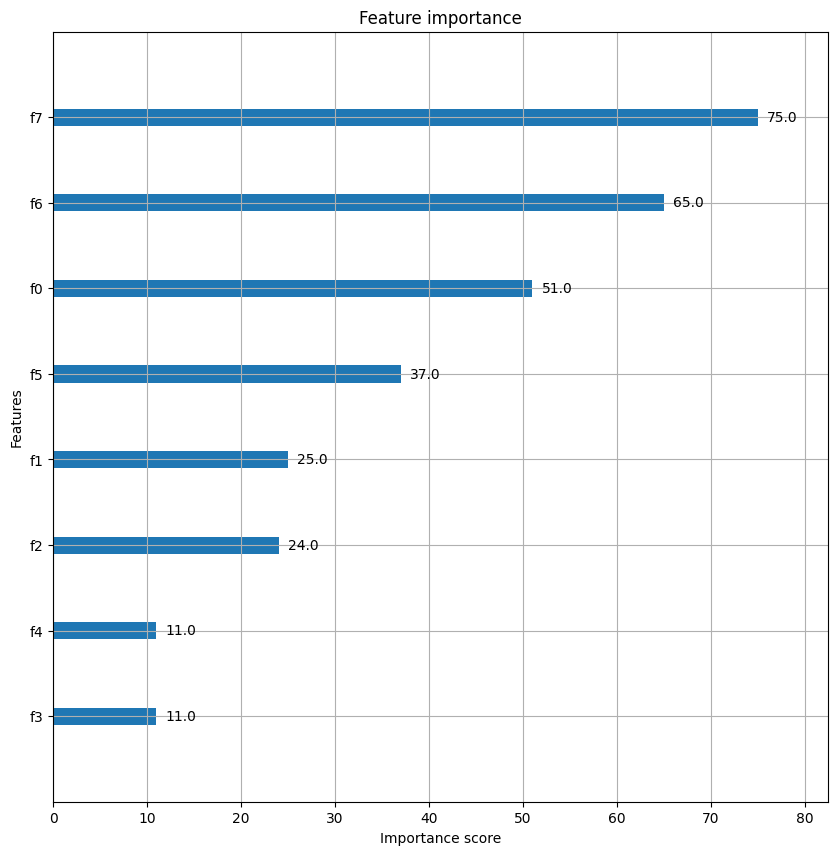

In [26]:
fig, ax = plt.subplots(figsize=(10,10))
plot_importance(xgbr_model, ax=ax)

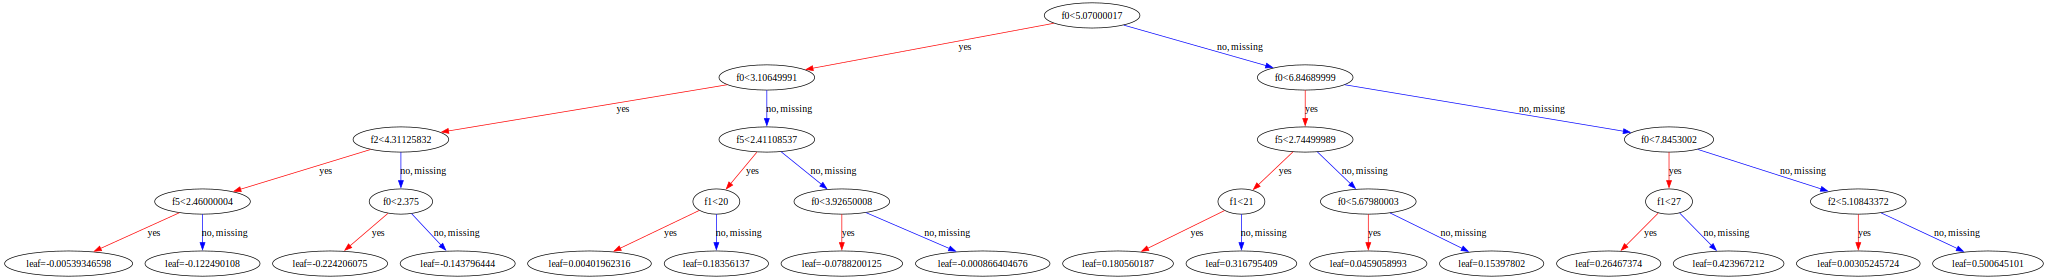

In [27]:
xgb.to_graphviz(xgbr_model)

c:\Users\main\miniconda3\envs\ml\Lib\site-packages\xgboost\plotting.py:267: FutureWarning: The `num_trees` parameter is deprecated, use `tree_idx` insetad. 
  warnings.warn(


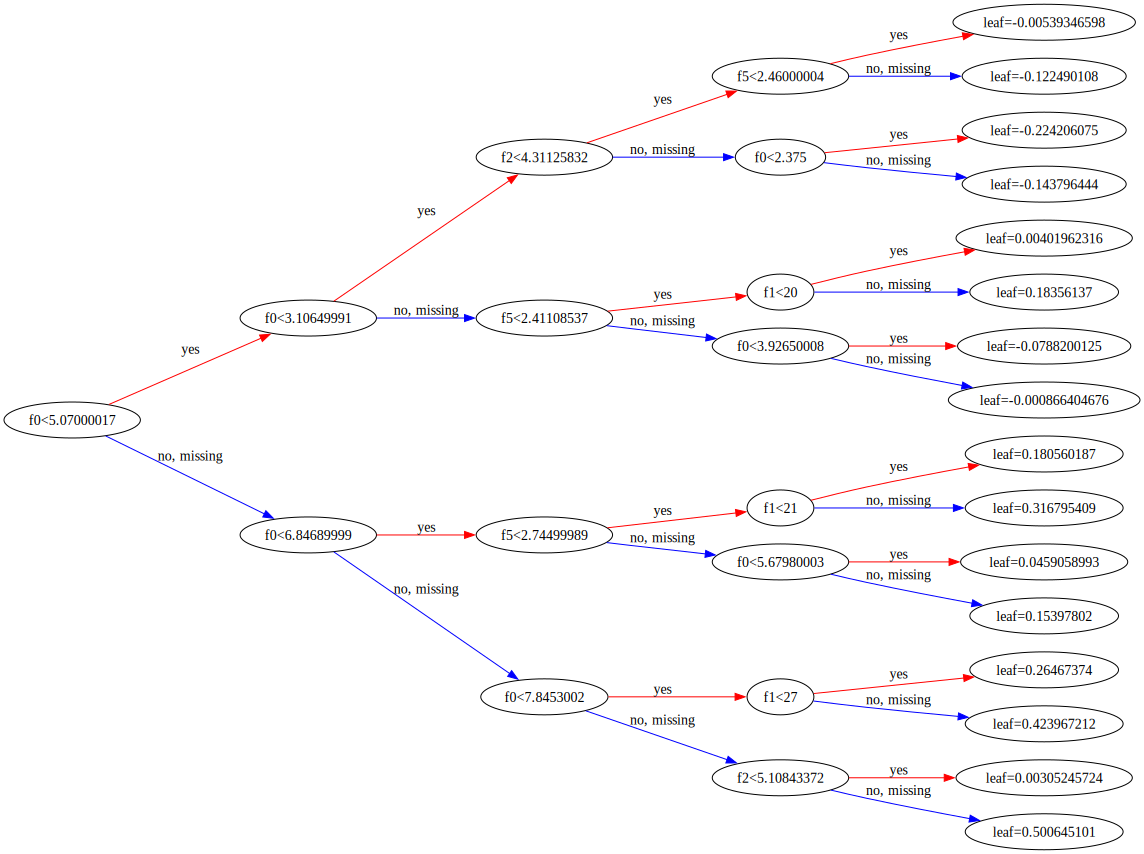

In [28]:
xgb.to_graphviz(xgbr_model, num_trees=0, rankdir='LR', size='20,20')